In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression



## Lectura y análisis de los datos

In [2]:
tomates=pd.read_csv('tomates.csv')
tomates.head()

,tipo_cultivo,ubicacion,tamanio,rdto,uso_fertilizantes
0,Semierecta.,1572,33997,0.8679,False
1,Semierecta.,1059,80481,0.6079,False
2,Rastrera.,1242,95781,0.9220,True
3,Erecta.,1286,98904,0.1078,False
4,Semierecta.,1109,69298,0.0916,False


In [3]:
tomates.shape

(10000, 5)

In [4]:
tomates.isnull().sum()

tipo_cultivo         0
ubicacion            0
tamanio              0
rdto                 0
uso_fertilizantes    0
dtype: int64

In [5]:
tomates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tipo_cultivo       10000 non-null  object 
 1   ubicacion          10000 non-null  int64  
 2   tamanio            10000 non-null  int64  
 3   rdto               10000 non-null  float64
 4   uso_fertilizantes  10000 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 322.4+ KB


In [7]:
tomates.describe().round(4)

,ubicacion,tamanio,rdto
count,10000.0000,10000.0000,10000.0000
mean,1504.9897,49987.6297,0.4993
std,290.3238,28924.1656,0.2892
min,1000.0000,100.0000,0.0001
25%,1253.0000,24616.0000,0.2495
50%,1508.0000,50197.0000,0.5006
75%,1761.0000,75208.7500,0.7500
max,2000.0000,99990.0000,0.9999


In [8]:
tomates['tipo_cultivo'].value_counts()

Erecta.        3409
Rastrera.      3346
Semierecta.    3245
Name: tipo_cultivo, dtype: int64

In [9]:
tomates['uso_fertilizantes'].value_counts()

False    5063
True     4937
Name: uso_fertilizantes, dtype: int64

In [11]:
tomates.columns

Index(['tipo_cultivo', 'ubicacion', 'tamanio', 'rdto', 'uso_fertilizantes'], dtype='object')

In [12]:
tomates.groupby(['tipo_cultivo'], as_index=False).agg({'tamanio':'mean'})

,tipo_cultivo,tamanio
0,Erecta.,49821.361690
1,Rastrera.,50057.927974
2,Semierecta.,50089.814484


In [18]:
tomates['tipo_cultivo']=tomates['tipo_cultivo'].replace({'Erecta.':1, 'Semierecta.':2, 'Rastrera.':3})

In [28]:
tomates['uso_fertilizantes']=tomates['uso_fertilizantes'].astype(str)

In [29]:
tomates['uso_fertilizantes']=tomates['uso_fertilizantes'].replace({'True':1, 'False':0})

In [30]:
tomates.head()

,tipo_cultivo,ubicacion,tamanio,rdto,uso_fertilizantes
0,2,1572,33997,0.8679,0
1,2,1059,80481,0.6079,0
2,3,1242,95781,0.9220,1
3,1,1286,98904,0.1078,0
4,2,1109,69298,0.0916,0


## Modelización de los Datos: CART Decission Tree

### División de los datos en validación y entrenamiento

In [40]:
X=tomates.drop(['rdto'], axis=1)
y=tomates['rdto']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)


MSE: 0.16930924162


In [65]:
X_test.shape

(500, 1)

In [66]:
y_test.shape

(2000,)

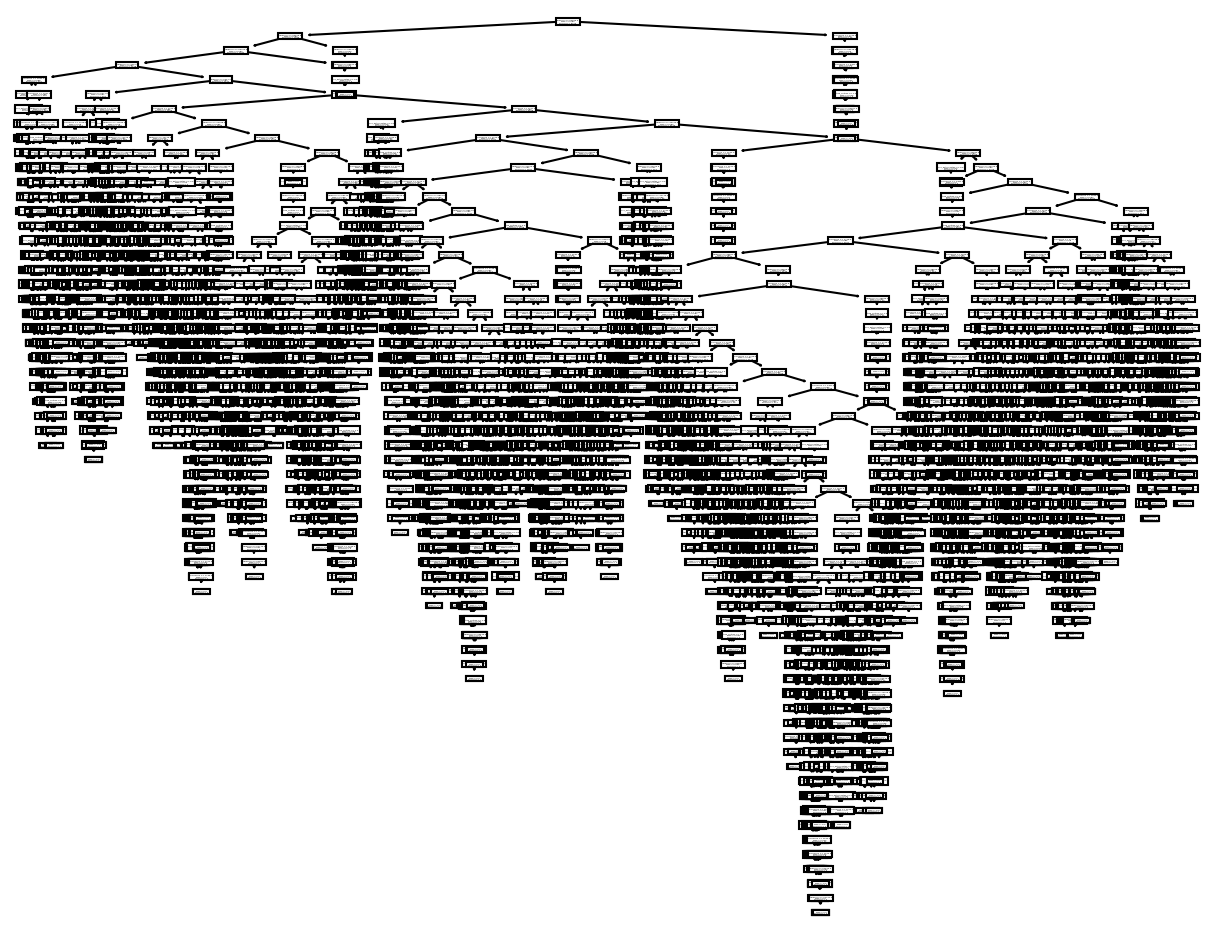

In [68]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8), dpi=150)
plot_tree(model, feature_names=X.columns);

In [54]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
model2.fit(X_train, y_train);

In [57]:
predictions = model2.predict(X_test)
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.25


### Importancia de las variables en el modelo

#### Importancia mediante regresión lineal

Feature: 0, Score: 16.82366
Feature: 1, Score: 18.99347
Feature: 2, Score: 46.07122
Feature: 3, Score: 28.62799
Feature: 4, Score: 24.74630
Index(['tipo_cultivo', 'ubicacion', 'tamanio', 'rdto', 'uso_fertilizantes'], dtype='object')


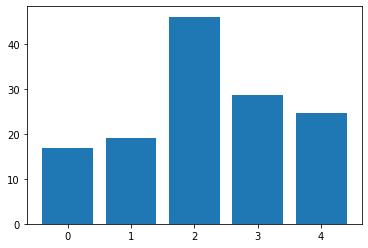

In [75]:

X, y = make_regression(n_samples=1000, n_features=5, n_informative=5, random_state=42)

model = LinearRegression()

model.fit(X, y)

importance = model.coef_

for i,v in enumerate(importance):
	print('Importancia: %0d, nivel: %.5f' % (i,v))

print(tomates.columns)
plt.bar([x for x in range(len(importance))], importance)
plt.show()

####  Importancia de variables por arbol de decisión regresor

Importancia: 0, nivel: 0.06563
Importancia: 1, nivel: 0.07140
Importancia: 2, nivel: 0.54036
Importancia: 3, nivel: 0.18586
Importancia: 4, nivel: 0.13674


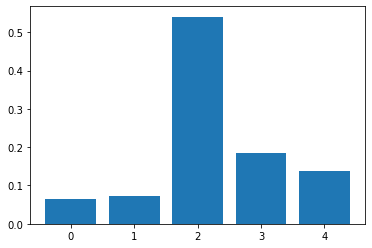

In [77]:
model = DecisionTreeRegressor()

model.fit(X, y)

importance = model.feature_importances_

for i,v in enumerate(importance):
	print('Importancia: %0d, nivel: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

#### Importancia de las varibales por arbol de decisión de clasificación

Importancia: 0, Nivel: 0.06759
Importancia: 1, Nivel: 0.11705
Importancia: 2, Nivel: 0.63984
Importancia: 3, Nivel: 0.09093
Importancia: 4, Nivel: 0.08460


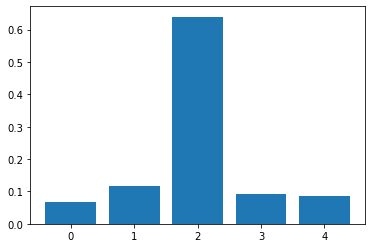

In [81]:

model = DecisionTreeClassifier()

model.fit(X, y)

importance = model.feature_importances_

for i,v in enumerate(importance):
	print('Importancia: %0d, Nivel: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()